In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tarfile
# tar = tarfile.open("/content/drive/MyDrive/Samal_work/ExtendedYaleB.tar")  
tar = tarfile.open("/content/drive/MyDrive/Samal_work/vggface2_test.tar.gz")
tar.extractall()
tar.close()

In [ ]:
import os 
import glob 

from PIL import Image, ImageDraw
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook
import cv2
import numpy as np

# path = '/content/ExtendedYaleB/'
path = '/content/test'
path_sorted = sorted(os.listdir(path))
print('path_sorted: ', path_sorted)

path_sorted:  ['n000001', 'n000009', 'n000029', 'n000040', 'n000078', 'n000082', 'n000106', 'n000129', 'n000148', 'n000149', 'n000178', 'n000259', 'n000284', 'n000363', 'n000394', 'n000410', 'n000452', 'n000480', 'n000527', 'n000596', 'n000624', 'n000654', 'n000658', 'n000659', 'n000667', 'n000689', 'n000706', 'n000736', 'n000740', 'n000746', 'n000774', 'n000775', 'n000785', 'n000836', 'n000838', 'n000854', 'n000912', 'n000928', 'n000945', 'n000950', 'n000958', 'n000998', 'n001021', 'n001059', 'n001125', 'n001127', 'n001146', 'n001153', 'n001156', 'n001174', 'n001190', 'n001197', 'n001199', 'n001211', 'n001242', 'n001256', 'n001277', 'n001291', 'n001293', 'n001296', 'n001299', 'n001302', 'n001303', 'n001304', 'n001337', 'n001341', 'n001368', 'n001401', 'n001418', 'n001439', 'n001446', 'n001467', 'n001485', 'n001576', 'n001650', 'n001655', 'n001672', 'n001683', 'n001687', 'n001708', 'n001710', 'n001781', 'n001811', 'n001816', 'n001817', 'n001830', 'n001836', 'n001838', 'n001850', 'n0018

In [ ]:
def get_files(path='./', end_path='/*.pgm', ext=('.info')):
    """ Get all image files """
    path_sorted = sorted(os.listdir(path))
    files_all = []
    for file in path_sorted:
       files_path = os.path.join(path, file)
       files_list = glob.glob(f'{files_path}{end_path}')
       files_all.extend(files_list)
    return files_all

def to_rgb_and_save(path):
    """ Some of the images may have RGBA mode """
    for p in path:
        img = Image.open(p)
        if img.mode != 'RGB':
            img = img.convert('RGB') 
            img.save(p)
            
def read_pgm_to_grey(pgm_path):
    image = cv2.imread(pgm_path) 
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grey

from math import ceil 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline 

from matplotlib.patches import Ellipse


def imshow(img, ax, title):  
    ax.imshow(img)
    if title:
        el = Ellipse((2, -1), 0.5, 0.5)
        ax.annotate(title, xy=(1, 0), xycoords='axes fraction', ha='right', va='bottom',
                    bbox=dict(boxstyle="round", fc="0.8"), 
                    arrowprops=dict(arrowstyle="simple", fc="0.6", ec="none", 
                                    patchB=el, connectionstyle="arc3, rad=0.3"))
    ax.set_xticks([]), ax.set_yticks([])

def plot_gallery(images, ncols, nrows, titles=None, title='', figsize=None): 
    if figsize is None: 
        figsize = (18, ncols) if ncols < 10 else (18, 20)  
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.02)

    for i, ax in enumerate(grid): 
        if i == len(images): break 
        imshow(images[i], ax, titles[i] if titles is not None else '')

    # there are some problems with suptitle alignment 
    y_title_pos = grid[0].get_position().get_points()[1][1] - 0.33 / (1 if nrows == 1 else nrows / 3)
    plt.suptitle(title, y=y_title_pos, fontsize=12)

def plot(paths=None, images=None, titles=None, axtitle=True, title='', to_size=(512, 512)): 
    """
    Plot image gallery by passing (paths, title) or (images, titles)
    :param paths: list of image paths
    :param images: list of (PIL.Image | np.array | torch.Tensor) objects 
    :param titles: list of image titles 
    :param bool axtitle: if paths is not None, then axtitle=True leads to use basedir name as titles 
    :param str title: gallery title   
    :param to_size: image resizing size before plot, default (512, 512)
    """

    if paths is not None and len(paths): 
        images = [Image.open(p).resize(to_size) for p in paths]

        nrows = int(ceil(len(images) / 12)) # 12 images per row 
        ncols = 12 if nrows > 1 else len(images)

        if axtitle: 
              titles = [os.path.dirname(p).split('/')[-1] for p in paths]

        plot_gallery(images, ncols, nrows, titles, title)

    elif images is not None and len(images): 
        if isinstance(images, list): 
            images = np.array(images)

        nrows = int(ceil(len(images) / 12)) # 12 images per row 
        ncols = 12 if nrows > 1 else len(images)

        # Rescale to [0., 1.]
        if images[0].max() > 1: 
            images /= 255. 

        # if torch.Tensor change axes 
        if not isinstance(images, np.ndarray): 
            if images.size(1) == 3 or 1: 
                images = images.permute((0, 2, 3, 1))

        plot_gallery(images, ncols, nrows, titles, title)


    else: 
        raise LookupError('You didnt pass any path or image objects')
    plt.show()

In [ ]:
from collections import Counter 

# ABS_PATH = '/content/ExtendedYaleB'
ABS_PATH = '/content/test'
# 1. Get path for ABS_PATH
# data = get_files(ABS_PATH)
data = get_files(ABS_PATH, end_path='/*.jpg')

print('length: ', len(data))
print('First element path in data: ', data[0])

length:  169396
First element path in data:  /content/test/n000001/0312_01.jpg


In [ ]:
# prepare info for printing
dataC = Counter(map(os.path.dirname, data))
data_total, data_text  = sum(dataC.values()), '\n'.join([f'\t- {os.path.basename(fp)} - {c}' for fp, c in dataC.items()])

print(f'Train files\n\tpath: {ABS_PATH}\n\ttotal number: {data_total}\n{data_text}')

Train files
	path: /content/test
	total number: 169396
	- n000001 - 424
	- n000009 - 136
	- n000029 - 454
	- n000040 - 180
	- n000078 - 458
	- n000082 - 441
	- n000106 - 279
	- n000129 - 585
	- n000148 - 367
	- n000149 - 522
	- n000178 - 208
	- n000259 - 431
	- n000284 - 344
	- n000363 - 505
	- n000394 - 242
	- n000410 - 199
	- n000452 - 454
	- n000480 - 312
	- n000527 - 329
	- n000596 - 357
	- n000624 - 446
	- n000654 - 200
	- n000658 - 440
	- n000659 - 491
	- n000667 - 526
	- n000689 - 400
	- n000706 - 301
	- n000736 - 444
	- n000740 - 210
	- n000746 - 324
	- n000774 - 310
	- n000775 - 261
	- n000785 - 580
	- n000836 - 186
	- n000838 - 306
	- n000854 - 477
	- n000912 - 410
	- n000928 - 259
	- n000945 - 353
	- n000950 - 257
	- n000958 - 451
	- n000998 - 229
	- n001021 - 219
	- n001059 - 236
	- n001125 - 159
	- n001127 - 308
	- n001146 - 594
	- n001153 - 203
	- n001156 - 302
	- n001174 - 231
	- n001190 - 544
	- n001197 - 182
	- n001199 - 423
	- n001211 - 379
	- n001242 - 644
	- n001256

In [ ]:
# 2. Convert all img to RGB 
to_rgb_and_save(data)

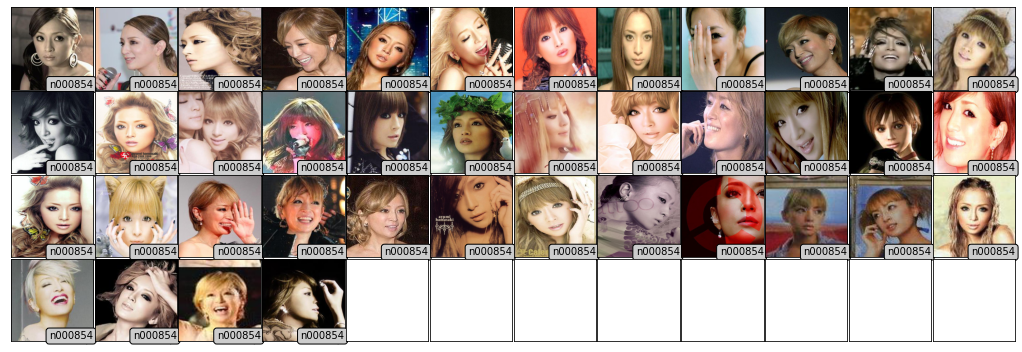

In [ ]:
plot(data[13000:13040])

In [ ]:
!pip install facenet-pytorch 

from facenet_pytorch import MTCNN, InceptionResnetV1, training, fixed_image_standardization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 28.1 MB/s 


In [ ]:
import tqdm 

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np

import shutil

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Running on device: {device}')

Running on device: cpu


In [ ]:
# from sklearn.model_selection import train_test_split
def crop_face_and_save(path, new_path=None, part_data=None, model=MTCNN, transformer=None,
                       params=None):
    """
    Detect face on each image, crop them and save to "new_path"
    :param str path: path with images will be passed to  datasets.ImageFolder
    :param str new_path: path to locate new "aligned" images, if new_path is None 
                     then new_path will be path + "_cropped" 
    :param model: model to detect faces, default MTCNN  
    :param transformer: transformer object will be passed to ImageFolder
    :param params: parameters of MTCNN model   
    :param part_data: list(start_ind, end_ind)
    """
    if not new_path: 
        new_path = path + '_cropped'

    # in case new_path exists MTCNN model will raise error 
    if os.path.exists(new_path):
        shutil.rmtree(new_path)

    # it is default parameters for MTCNN 
    if not params:
        params = {
            'image_size': 160, 'margin': 0, 
            'min_face_size': 10, 'thresholds': [0.6, 0.7, 0.7],
            'factor': 0.709, 'post_process': False, 'device': device
            }
    
    model = model(**params)

    if not transformer:
        transformer = transforms.Lambda(
            lambd=lambda x: x.resize((1280, 1280)) if (np.array(x) > 2000).all() else x
        )

    if part_data:
      # for convenience we will use ImageFolder instead of getting Image objects by file paths  
      dataset = datasets.ImageFolder(path, transform=transformer)
      dataset.samples = [(p, p.replace(path, new_path)) for p, _ in dataset.samples]
      dataset.samples = dataset.samples[part_data[0]:part_data[1]]
      print(len(dataset), dataset.samples[0])
    else:
      # for convenience we will use ImageFolder instead of getting Image objects by file paths  
      dataset = datasets.ImageFolder(path, transform=transformer)
      dataset.samples = [(p, p.replace(path, new_path)) for p, _ in dataset.samples]
      print(len(dataset), dataset.samples[0])

    # batch size 1 as long as we havent exact image size and MTCNN will raise an error
    loader = DataLoader(dataset, batch_size=1, collate_fn=training.collate_pil)
    print('length loader ', len(loader), loader)

    for (i, (x, y)) in list(enumerate(tqdm.tqdm(loader))): 
        model(x, save_path=y)

    # spare some memory 
    del model, loader, dataset 

In [ ]:
print('length of the data:', len(data))
if len(data)>30_000:
  print('Please, devide your dataset and save it partly!!!!!!!!!!')
part_size = 5
start, end = 0, int(len(data)/part_size)+1
part_data = [start, end]
step = 30_000
new_ends = [end]
while end < len(data):
    end = end+step
    new_ends.append(end)
print(part_data)
print('Here is a list of new ends which you past to the parameter part_data[START, END] as a new part of data')
print(new_ends)
print('Please DO NOT MISS to change dataset zip NAME for EACH part')
print('GOOD LUCK!')

length of the data: 169396
Please, devide your dataset and save it partly!!!!!!!!!!
[0, 33880]
Here is a list of new ends which you past to the parameter part_data[START, END] as a new part of data
[33880, 63880, 93880, 123880, 153880, 183880]
Please DO NOT MISS to change dataset zip NAME for EACH part
GOOD LUCK!


In [ ]:
ALIGNED_DATA = '/content/vggface2_test_cropped_1'
# ALIGNED_DATA = ABS_PATH + '_cropped'
print(ALIGNED_DATA)
DATA = ABS_PATH

# 3. Crop train dataset faces and save aligned images 
print('\t- Train data')
# crop_face_and_save(DATA, ALIGNED_DATA) # for small one dataset without part_data parameter
part_data = [0, new_ends[0]] #[new_ends[0], new_ends[1]]
print('current part_data', part_data)
crop_face_and_save(DATA, ALIGNED_DATA, part_data)

# !zip -r /content/ExtendedYaleB_cropped.zip /content/ExtendedYaleB_cropped

!zip -r /content/vggface2_test_cropped_1.zip /content/vggface2_test_cropped_1

from google.colab import files
# files.download("/content/ExtendedYaleB_cropped.zip")
files.download("/content/vggface2_test_cropped_1.zip")

# !cp /content/ExtendedYaleB_cropped.zip /content/drive/MyDrive/Samal_work
!cp /content/vggface2_test_cropped_1.zip /content/drive/MyDrive/Samal_work

/content/vggface2_test_cropped_1
	- Train data
current part_data [0, 33880]
33880 ('/content/test/n000001/0001_01.jpg', '/content/vggface2_test_cropped_1/n000001/0001_01.jpg')
length loader  33880 <torch.utils.data.dataloader.DataLoader object at 0x7f0b2783a2b0>


100%|██████████| 33880/33880 [01:27<00:00, 386.69it/s]


Streaming output truncated to the last 5000 lines.
  adding: content/vggface2_test_cropped_1/n001127/0050_02.jpg (deflated 5%)
  adding: content/vggface2_test_cropped_1/n001127/0142_01.jpg (deflated 3%)
  adding: content/vggface2_test_cropped_1/n001127/0269_02.jpg (deflated 4%)
  adding: content/vggface2_test_cropped_1/n001127/0129_02.jpg (deflated 4%)
  adding: content/vggface2_test_cropped_1/n001127/0105_02.jpg (deflated 5%)
  adding: content/vggface2_test_cropped_1/n001127/0442_01.jpg (deflated 4%)
  adding: content/vggface2_test_cropped_1/n001127/0248_01.jpg (deflated 6%)
  adding: content/vggface2_test_cropped_1/n001127/0582_02.jpg (deflated 3%)
  adding: content/vggface2_test_cropped_1/n001127/0145_02.jpg (deflated 6%)
  adding: content/vggface2_test_cropped_1/n001127/0428_02.jpg (deflated 3%)
  adding: content/vggface2_test_cropped_1/n001127/0407_01.jpg (deflated 4%)
  adding: content/vggface2_test_cropped_1/n001127/0410_02.jpg (deflated 4%)
  adding: content/vggface2_test_cropp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ABS_PATH

'/content/ExtendedYaleB'

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Samal_work/ExtendedYaleB_cropped.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
ALIGNED_DATA = '/content/content/ExtendedYaleB_cropped'
DATA = ABS_PATH

In [ ]:
# check if some imgs were missed by detector and failed to save 
data_files, aligned_data_files = get_files(DATA), get_files(ALIGNED_DATA)
if len(data_files) != len(aligned_data_files): 
    files = set(map(lambda fp: os.path.relpath(fp, start=DATA), data_files))
    maked_aligned_files = set(map(lambda fp: os.path.relpath(fp, start=ALIGNED_DATA), aligned_data_files))
    detect_failed_data_files = list(files - maked_aligned_files)
    print(f"\nfiles {len(maked_aligned_files)}/{len(files)}: {', '.join(detect_failed_data_files)} were not saved")

In [ ]:
print(f'number of failed images: {len(detect_failed_data_files)}')

In [ ]:
alignedF = get_files(ALIGNED_DATA)
plot(paths=alignedF[100:110], title='Aligned images')

In [ ]:
# Plot failed to aligned train images
dataFailF = list(map(lambda fp: os.path.join(DATA, fp), detect_failed_data_files))
plot(paths=dataFailF[100:110], title='Failed to aligne')

In [ ]:
!pip install albumentations

import albumentations as A

In [ ]:
from facenet_pytorch import fixed_image_standardization

standard_transform = transforms.Compose([
                                np.float32, 
                                transforms.ToTensor(),
                                fixed_image_standardization
])

aug_mask = A.Compose([
                   A.HorizontalFlip(p=0.5),
                   A.VerticalFlip(p=0.15),
                   A.RandomContrast(limit=0.5, p=0.4),
                   A.Rotate(30, p=0.2),
                   A.RandomSizedCrop((120, 120), 160, 160, p=0.4),
                   A.OneOrOther(A.JpegCompression(p=0.2), A.Blur(p=0.2), p=0.66),
                   A.OneOf([
                            A.Rotate(45, p=0.3),
                            A.ElasticTransform(sigma=20, alpha_affine=20, border_mode=0, p=0.2)
                            ], p=0.5),
                  A.HueSaturationValue(val_shift_limit=10, p=0.3)
], p=1)

transform = {
    'train': transforms.Compose([
                                 transforms.Lambda(lambd=lambda x: aug_mask(image=np.array(x))['image']),
                                 standard_transform
    ]),
    'test': standard_transform
}

In [ ]:
from torch.utils.data import SubsetRandomSampler


b = 32

# Original train images 
trainD = datasets.ImageFolder(ALIGNED_DATA, transform=standard_transform)
# Augmented train images 
trainD_aug = datasets.ImageFolder(ALIGNED_DATA, transform=transform['train'])
# Train Loader
trainL = DataLoader(trainD, batch_size=b, num_workers=2) # x: torch.Size([batch_size, 3, 160, 160]), y: torch.Size([batch_size])
trainL_aug = DataLoader(trainD_aug, batch_size=b, num_workers=2)

# Convert encoded labels to named claasses
IDX_TO_CLASS = np.array(list(trainD.class_to_idx.keys()))
CLASS_TO_IDX = dict(trainD.class_to_idx.items())

In [ ]:
from facenet_pytorch import InceptionResnetV1
import torch
import torch.nn as nn

model = InceptionResnetV1(pretrained='vggface2', dropout_prob=0.5, device=device).eval()

In [ ]:
def fixed_denormalize(image): 
    """ Restandartize images to [0, 255]"""
    return image * 128 + 127.5
def make_new_model(model):
    lin = model.last_linear #(last_linear): Linear(in_features=1792, out_features=512, bias=False)
    new_lin = nn.Linear(1792,128, bias=False)
    model.last_linear = new_lin
    lin = model.last_bn
    new_lin = nn.BatchNorm1d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    model.last_bn = new_lin 
def getEmbeds(model, n, loader, imshow=False, n_img=5):
    model.eval()
    make_new_model(model)
    # images to display 
    images = []

    embeds, labels = [], []
    for n_i in tqdm.trange(n): 
        for i, (x, y) in enumerate(loader, 1): 

            # on each first batch get 'n_img' images  
            if imshow and i == 1: 
                inds = np.random.choice(x.size(0), min(x.size(0), n_img))
                images.append(fixed_denormalize(x[inds].data.cpu()).permute((0, 2, 3, 1)).numpy())

            embed = model(x.to(device))
            embed = embed.data.cpu().numpy()
            embeds.append(embed), labels.extend(y.data.cpu().numpy())

    if imshow: 
        plot(images=np.concatenate(images))

    return np.concatenate(embeds), np.array(labels)

In [ ]:
# 3. Get embeddings 
# Train embeddings 
# model = InceptionResnetV1(pretrained='vggface2', dropout_prob=0.5, device=device).eval()
# trainEmbeds, trainLabels = getEmbeds(model, 1, trainL, False)
# trainEmbeds_aug, trainLabels_aug = getEmbeds(model, 50, trainL_aug, imshow=True, n_img=1)

# trainEmbeds = np.concatenate([trainEmbeds, trainEmbeds_aug])
# trainLabels = np.concatenate([trainLabels, trainLabels_aug])

In [ ]:
# 3. Get embeddings 
# Train embeddings 
# model = InceptionResnetV1(pretrained='vggface2', dropout_prob=0.5, device=device).eval()
# trainEmbeds, trainLabels = getEmbeds(model, 1, trainL, False)
# print(len(trainEmbeds))
# # 4. Save embeddings 
# DATA_PATH = '/content/drive/MyDrive/Samal_work'
# TRAIN_EMBEDS = os.path.join(DATA_PATH, 'trainEmbeds.npz')

# np.savez(TRAIN_EMBEDS, x=trainEmbeds, y=trainLabels)
# # Load the saved embeddings to use them futher 
# trainEmbeds, trainLabels = np.load(TRAIN_EMBEDS, allow_pickle=True).values()

# # Get named labels
# trainLabels = IDX_TO_CLASS[trainLabels]

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Samal_work'
TRAIN_EMBEDS = os.path.join(DATA_PATH, 'trainEmbeds.npz')
# Load the saved embeddings to use them futher 
trainEmbeds, trainLabels = np.load(TRAIN_EMBEDS, allow_pickle=True).values()
# Get named labels
trainLabels = IDX_TO_CLASS[trainLabels]

In [ ]:
print(f'number of trainEmbeds samples: {len(trainEmbeds)} and labels from 450 to 500: {trainLabels[450:500]}')

In [ ]:
# trainEmbeds_aug, trainLabels_aug = getEmbeds(model, 10, trainL_aug) # time 10 different augmentations

# 4. Save embeddings 
# DATA_PATH = '/content/drive/MyDrive/Paper'
# TRAIN_EMBEDS_AUG = os.path.join(DATA_PATH, 'trainEmbeds_aug.npz')

# np.savez(TRAIN_EMBEDS_AUG, x=trainEmbeds_aug, y=trainLabels_aug)
# # Load the saved embeddings to use them futher 
# trainEmbeds_aug, trainLabels_aug = np.load(TRAIN_EMBEDS_AUG, allow_pickle=True).values()

# # Get named labels
# trainLabels_aug = IDX_TO_CLASS[trainLabels_aug]

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Samal_work'
TRAIN_EMBEDS_AUG = os.path.join(DATA_PATH, 'trainEmbeds_aug.npz')
# load the saved embeddings
trainEmbeds_aug, trainLabels_aug = np.load(TRAIN_EMBEDS_AUG, allow_pickle=True).values()

# Get named labels
trainLabels_aug = IDX_TO_CLASS[trainLabels_aug]

# Clustering features

In [ ]:
from sklearn.metrics import pairwise_distances
import pandas as pd
import seaborn as sns 
sns.set()

def getDist(x, metric='euclidean', index=None, columns=None):
    dists = pairwise_distances(x, x, metric=metric)
    return pd.DataFrame(dists, index=index, columns=columns)

def heatmap(x, title='', cmap='Greens', linewidth=1):
    plt.figure(figsize=(17, 12))
    plt.title(title)
    sns.heatmap(x, cmap=cmap, square=True)
    plt.show()

# for each user get only number embeddings
def getDataEmbeding(data, labels, number=100):
  data_emb, labels_emb = [], []
  unique_inds = np.unique(labels)
  for ind in unique_inds:
    print(ind)
    n = 0
    for i, label in enumerate(labels):
      if label == ind and n < number:
        data_emb.append(data[i])
        labels_emb.append(label)
        n += 1
  return np.array(data_emb), np.array(labels_emb)

In [ ]:
trainEmbeds_100, trainLabels_100 = getDataEmbeding(trainEmbeds, trainLabels, 10)
print(np.shape(trainEmbeds_100), len(trainLabels_100))
trainLabels_100 = IDX_TO_CLASS[trainLabels_100]
print(np.shape(trainEmbeds_100), len(trainLabels_100))

yaleB11
yaleB12
yaleB13
yaleB15
yaleB16
yaleB17
yaleB18
yaleB19
yaleB20
yaleB21
yaleB22
yaleB23
yaleB24
yaleB25
yaleB26
yaleB27
yaleB28
yaleB29
yaleB30
yaleB31
yaleB32
yaleB33
yaleB34
yaleB35
yaleB36
yaleB37
yaleB38
yaleB39
(280, 128) 280


IndexError: ignored

In [ ]:
# Note 88 first images are original and 4247 are augmented
# as long as to calculate (4335, 512) distance matrix is time consuming we get only distances of originals 
inds = range(280)

# Train embeddings 
dists = getDist(trainEmbeds_100[inds], metric='euclidean', index=trainLabels_100[inds], columns=trainLabels_100[inds])
heatmap(dists, 'euclidean distance')

dists = getDist(trainEmbeds_100[inds], metric='cosine', index=trainLabels_100[inds], columns=trainLabels_100[inds])
heatmap(dists, 'cosine distance')

In [ ]:
from sklearn.manifold import TSNE


inds = range(180, 280)
X_tsne1 = TSNE(n_components=2, init='pca', random_state=33).fit_transform(trainEmbeds_100[inds])
X_tsne2 = TSNE(n_components=2, init='random', random_state=33).fit_transform(trainEmbeds_100[inds])
y = [CLASS_TO_IDX[label] for label in trainLabels_100[inds]]

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

img = ax[0].scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=y, alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax[1].scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y, alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))

ax[0].set_title('TSNE with pca init')
ax[1].set_title('TSNE with random init')
plt.suptitle('Face embeddings')

cbar = plt.colorbar(img, ax=ax)
cbar.ax.set_yticklabels(np.unique(trainLabels_100[inds])) 
plt.show()

# SynergyNet 

In [ ]:
print('\n> Cloning the repo')
!git clone https://github.com/choyingw/SynergyNet

%cd SynergyNet

In [ ]:
%cd Sim3DR
!sh ./build_sim3dr.sh

%cd ../FaceBoxes
!sh ./build_cpu_nms.sh
%cd ..

# !gdown --id 1SQsMhvAmpD1O8Hm0yEGom0C0rXtA0qs8
# !unzip -n 3dmm_data
!unzip -n /content/drive/MyDrive/Samal_work/3dmm_data.zip

!gdown --id 1BVHbiLTfX6iTeJcNbh-jgHjWDoemfrzG

%ls

In [ ]:
!mv /content/drive/MyDrive/Samal_work/best_pose.pth.tar  ./pretrained
%ls

In [ ]:
import torch
import torchvision.transforms as transforms
import numpy as np
import cv2
from utils.ddfa import ToTensor, Normalize
from model_building import SynergyNet
from utils.inference import crop_img, predict_sparseVert, draw_landmarks, predict_denseVert, predict_pose, draw_axis
import argparse
import torch.backends.cudnn as cudnn
cudnn.benchmark = True
import os
import os.path as osp
import glob
from FaceBoxes import FaceBoxes
from utils.render import render
import scipy.io as sio

In [ ]:
img = cv2.imread('/content/content/ExtendedYaleB_cropped/yaleB11/yaleB11_P00A+000E+00.pgm')
print(np.shape(img))

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('-f', '--files', default='./img/', help='path to a single image or path to a folder containing multiple images')
parser.add_argument("--png", action="store_true", help="if images are with .png extension")
parser.add_argument('--img_size', default=160, type=int)
parser.add_argument('-b', '--batch-size', default=1, type=int)

args = parser.parse_args()
args.files = '/content/content/ExtendedYaleB_cropped'

In [ ]:
ABS_PATH_CROPPED = '/content/content/ExtendedYaleB_cropped'
# 1. Get path for ABS_PATH
data_cropped = get_files(ABS_PATH_CROPPED)
print('length of data_cropped: ', len(data_cropped))
files = data_cropped

In [ ]:
ABS_PATH_ORG = '/content/ExtendedYaleB'
# 1. Get path for ABS_PATH
data_org = get_files(ABS_PATH_ORG)
print('length of data_org: ', len(data_org))
files_org = data_org

In [ ]:
img = cv2.imread('/content/ExtendedYaleB/yaleB11/yaleB11_P00A+000E+00.pgm')
print(np.shape(img))

In [ ]:
# Following 3DDFA-V2, we also use 120x120 resolution
IMG_SIZE = 120

# load pre-tained model
checkpoint_fp = 'pretrained/best_pose.pth.tar' 
args.arch = 'mobilenet_v2'
args.devices_id = [0]

checkpoint = torch.load(checkpoint_fp, map_location=lambda storage, loc: storage)['state_dict']
    
model = SynergyNet(args)
model_dict = model.state_dict()

# because the model is trained by multiple gpus, prefix 'module' should be removed
for k in checkpoint.keys():
    model_dict[k.replace('module.', '')] = checkpoint[k]

model.load_state_dict(model_dict, strict=False)
# model = model.cuda()
model.eval()

# face detector
face_boxes = FaceBoxes()

# preparation
transform = transforms.Compose([ToTensor(), Normalize(mean=127.5, std=128)])

In [ ]:
ABS_PATH_CROPPED = '/content/content/ExtendedYaleB_cropped'
# 1. Get path for ABS_PATH
data_cropped = get_files(ABS_PATH_CROPPED)
print('length of data_cropped: ', len(data_cropped))
files = data_cropped

ABS_PATH_ORG = '/content/ExtendedYaleB'
# 1. Get path for ABS_PATH
data_org = get_files(ABS_PATH_ORG)
print('length of data_org: ', len(data_org))
files_org = data_org

In [ ]:
# here I will check the rightness of the order in trainEmbeds
DATA_PATH = '/content/drive/MyDrive/Samal_work'
TRAIN_EMBEDS = os.path.join(DATA_PATH, 'trainEmbeds.npz')
trainEmbeds, trainLabels = np.load(TRAIN_EMBEDS, allow_pickle=True).values()
trainLabels = IDX_TO_CLASS[trainLabels]
# prepare info for printing
unique_labels = np.unique(trainLabels)
Embedings_number = []
for label in unique_labels:
  sum = len([lab for lab in trainLabels if lab == label])
  print(f'label {label} - {sum}')
  Embedings_number.append(sum)

In [ ]:
filesC = Counter(map(os.path.dirname, data_cropped))
print(filesC.items())
cropped_data_element_number = [elem[1] for elem in filesC.items()]
print(f'Is the number in trainEmbeds is coincides with cropped_data? {cropped_data_element_number==Embedings_number}')

In [ ]:
# for obtaning the paths to images in original dataset which is contained in cropped_dataset
def filter_by_names(files, files_org): 
  number = len(files)
  ind_lists = []
  for i in tqdm.tqdm(range(number)):
    word = files[i][46:]
    name = next(filter(lambda line: word in line, files_org), None)
    ind_lists.append(name)
  return ind_lists

#obtain list of the paths to original images 
#but only images which embeddings we obtained and saved before
#also ORDER is saved!!!
filtered_files_org = filter_by_names(files, files_org)
print(filtered_files_org[0])

In [ ]:
#here you can obtan the index of the image in the original dataset which is has 600 index in cropped dataset
# print(files[600]) 
# word = files[600][46:]
# for ind, line in enumerate(files_org):
#   if word in line:
#     print(ind)
#     elem = ind
#     break
# print(elem)
# print(files_org[elem])

In [ ]:
# removes the folders
# !rm -rf /content/SynergyNet/inference_output/landmarks
# !rm -rf /content/SynergyNet/inference_output/poses
# !rm -rf /content/SynergyNet/inference_output/rendering_overlay

In [ ]:
# img_fp = filtered_files_org[0]
img_fp = files[0]
img_ori = cv2.imread(img_fp)

# crop faces
rects = face_boxes(img_ori)
print('shape crop face: ', np.shape(rects))

In [ ]:
# storage
pts_res = []
poses = []
vertices_lst = []
for idx, rect in enumerate(rects):
    roi_box = rect

    # enlarge the bbox a little and do a square crop
    HCenter = (rect[1] + rect[3])/2
    WCenter = (rect[0] + rect[2])/2
    side_len = roi_box[3]-roi_box[1]
    margin = side_len * 1.2 // 2
    roi_box[0], roi_box[1], roi_box[2], roi_box[3] = WCenter-margin, HCenter-margin, WCenter+margin, HCenter+margin

    img = crop_img(img_ori, roi_box)
    img = cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_LINEAR)
    # cv2.imwrite(f'validate_{idx}.png', img)
            
    input = transform(img).unsqueeze(0)
    with torch.no_grad():
        input = input
        param = model.forward_test(input)
        param = param.squeeze().cpu().numpy().flatten().astype(np.float32)

    # inferences
    lmks = predict_sparseVert(param, roi_box, transform=True)
    vertices = predict_denseVert(param, roi_box, transform=True)
    angles, translation = predict_pose(param, roi_box)

    pts_res.append(lmks)
    vertices_lst.append(vertices)
    poses.append([angles, translation, lmks])
print(poses)

In [ ]:
def _to_ctype(arr):
    if not arr.flags.c_contiguous:
        return arr.copy(order='C')
    return arr
tri = sio.loadmat('./3dmm_data/tri.mat')['tri'] - 1

In [ ]:
if not osp.exists(f'inference_output/rendering_overlay/'):
    os.makedirs(f'inference_output/rendering_overlay/')
if not osp.exists(f'inference_output/landmarks/'):
    os.makedirs(f'inference_output/landmarks/')
if not osp.exists(f'inference_output/poses/'):
    os.makedirs(f'inference_output/poses/')
        
name = img_fp.rsplit('/',1)[-1][:-4]
img_ori_copy = img_ori.copy()

# mesh
render(img_ori, vertices_lst, alpha=0.6, wfp=f'inference_output/rendering_overlay/{name}.jpg', connectivity=tri)
        
# landmarks
draw_landmarks(img_ori_copy, pts_res, wfp=f'inference_output/landmarks/{name}.jpg')
        
# face orientation
img_axis_plot = img_ori_copy
for angles, translation, lmks in poses:
    img_axis_plot = draw_axis(img_axis_plot, angles[0], angles[1],
        angles[2], translation[0], translation[1], size = 50, pts68=lmks)
wfp = f'inference_output/poses/{name}.jpg'
cv2.imwrite(wfp, img_axis_plot)
print(f'Save pose result to {wfp}')

In [ ]:
3.1415843632036564, -13.362497195510159, 1.0296903927804515
2.3752106279373595, -9.47041505322396, 1.9684235337611546
0.5379747908832186, -2.751387499249689, 3.58913236385132
-1.257643053900676, 4.869512831753166, 1.596513547963055

(-1.257643053900676, 4.869512831753166, 1.596513547963055)

In [ ]:
-8.667112044286936, -10.001477594442227, 1.239900751248737 # files org 1273
-9.5997748109191, -13.407816972047488, 2.6583563294110313 # files 1000 

(-9.5997748109191, -13.407816972047488, 2.6583563294110313)

In [ ]:
[-17.75544288113422, -7.272644240395628, -1.7528142779753102] # 0 filtered_files_org
[-11.276586184647952, -3.5968978557964575, 2.850853680686917] # 0 files
